# Phishing Dataset Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

### 1. Loading the Data

Link to dataset: https://www.kaggle.com/datasets/shibumohapatra/book-my-show/data

The input dataset contains an 11k sample corresponding to the 11k URLs. 

Each sample includes 32 features that give a different and unique description of U ranging from -1,0,1.

-1: Suspicious

0: Phishing

1: Legitimate

The sample could be either legitimate or phishing.

In [3]:
df = pd.read_csv('dataset.csv')
df.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,0,1,1,1,0,0,0,0,0,...,1,1,0,0,0,0,1,1,0,0
1,2,1,1,1,1,1,0,-1,1,0,...,1,1,0,0,-1,0,1,1,1,0
2,3,1,-1,1,1,1,0,0,0,0,...,1,1,1,0,1,0,1,-1,0,0
3,4,1,-1,1,1,1,0,0,0,1,...,1,1,0,0,1,0,1,0,1,0
4,5,1,-1,0,1,1,0,1,1,0,...,0,1,0,0,-1,0,1,1,1,1


### 2. Exploratory Data Analysis

In [4]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset")

There are 11055 rows and 32 columns in the dataset


In [5]:
#Listing the features of the dataset
df.columns

Index(['index', 'having_IPhaving_IP_Address', 'URLURL_Length',
       'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting',
       'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token',
       'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord',
       'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page',
       'Statistical_report', 'Result'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   index                        11055 non-null  object
 1   having_IPhaving_IP_Address   11055 non-null  int64 
 2   URLURL_Length                11055 non-null  int64 
 3   Shortining_Service           11055 non-null  int64 
 4   having_At_Symbol             11055 non-null  int64 
 5   double_slash_redirecting     11055 non-null  int64 
 6   Prefix_Suffix                11055 non-null  int64 
 7   having_Sub_Domain            11055 non-null  int64 
 8   SSLfinal_State               11055 non-null  int64 
 9   Domain_registeration_length  11055 non-null  int64 
 10  Favicon                      11055 non-null  int64 
 11  port                         11055 non-null  int64 
 12  HTTPS_token                  11055 non-null  int64 
 13  Request_URL                  11

In [7]:
df.nunique()

index                          8143
having_IPhaving_IP_Address        2
URLURL_Length                     3
Shortining_Service                2
having_At_Symbol                  2
double_slash_redirecting          2
Prefix_Suffix                     2
having_Sub_Domain                 3
SSLfinal_State                    3
Domain_registeration_length       2
Favicon                           2
port                              2
HTTPS_token                       2
Request_URL                       2
URL_of_Anchor                     3
Links_in_tags                     3
SFH                               3
Submitting_to_email               2
Abnormal_URL                      2
Redirect                          2
on_mouseover                      2
RightClick                        2
popUpWidnow                       2
Iframe                            2
age_of_domain                     2
DNSRecord                         2
web_traffic                       3
Page_Rank                   

Checking for Empty values in the dataset

In [8]:
df.isnull().sum().sort_values(ascending=False)

index                          0
having_IPhaving_IP_Address     0
Statistical_report             0
Links_pointing_to_page         0
Google_Index                   0
Page_Rank                      0
web_traffic                    0
DNSRecord                      0
age_of_domain                  0
Iframe                         0
popUpWidnow                    0
RightClick                     0
on_mouseover                   0
Redirect                       0
Abnormal_URL                   0
Submitting_to_email            0
SFH                            0
Links_in_tags                  0
URL_of_Anchor                  0
Request_URL                    0
HTTPS_token                    0
port                           0
Favicon                        0
Domain_registeration_length    0
SSLfinal_State                 0
having_Sub_Domain              0
Prefix_Suffix                  0
double_slash_redirecting       0
having_At_Symbol               0
Shortining_Service             0
URLURL_Len

Dropping the index column

In [9]:
df = df.drop('index',axis=1)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
having_IPhaving_IP_Address,11055.0,0.656897,0.474767,0.0,0.0,1.0,1.0,1.0
URLURL_Length,11055.0,0.165084,0.402826,-1.0,0.0,0.0,0.0,1.0
Shortining_Service,11055.0,0.869380,0.336999,0.0,1.0,1.0,1.0,1.0
having_At_Symbol,11055.0,0.850294,0.356799,0.0,1.0,1.0,1.0,1.0
double_slash_redirecting,11055.0,0.870737,0.335506,0.0,1.0,1.0,1.0,1.0
Prefix_Suffix,11055.0,0.132519,0.339070,0.0,0.0,0.0,0.0,1.0
having_Sub_Domain,11055.0,0.040525,0.833195,-1.0,-1.0,0.0,1.0,1.0
SSLfinal_State,11055.0,0.467119,0.678297,-1.0,0.0,1.0,1.0,1.0
Domain_registeration_length,11055.0,0.331615,0.470815,0.0,0.0,0.0,1.0,1.0
Favicon,11055.0,0.814292,0.388888,0.0,1.0,1.0,1.0,1.0


##### Observations:
1. There are 11055 instances and 31 features in the dataset.

2. 30 features are independent and 1 is dependent.

3. There are no missing or null values.

4. Every feature is int datatype.

### 3. Visualizing the Data

Plotting graphs to display how the data is distributed and to find the correlation of the features.

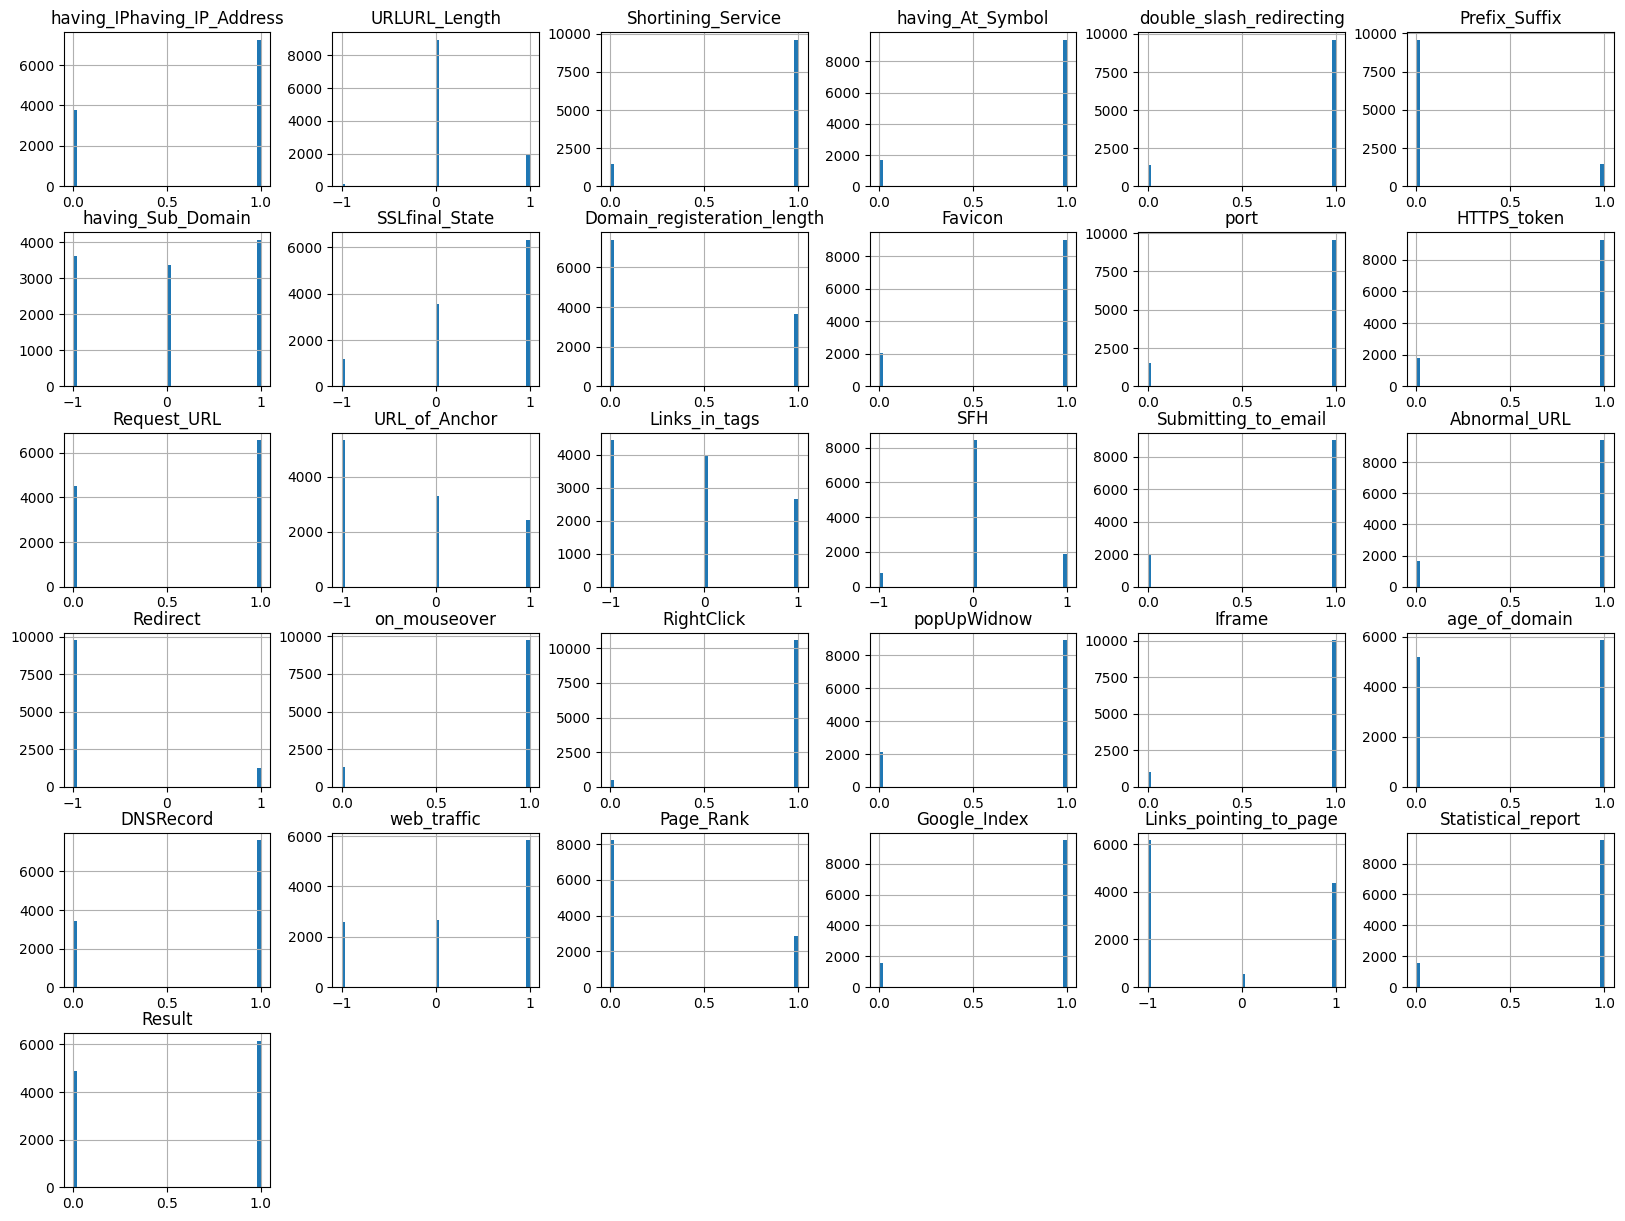

In [11]:
# Univariate Analysis
df.hist(bins=50, figsize=(20,15))
plt.show()

<Axes: >

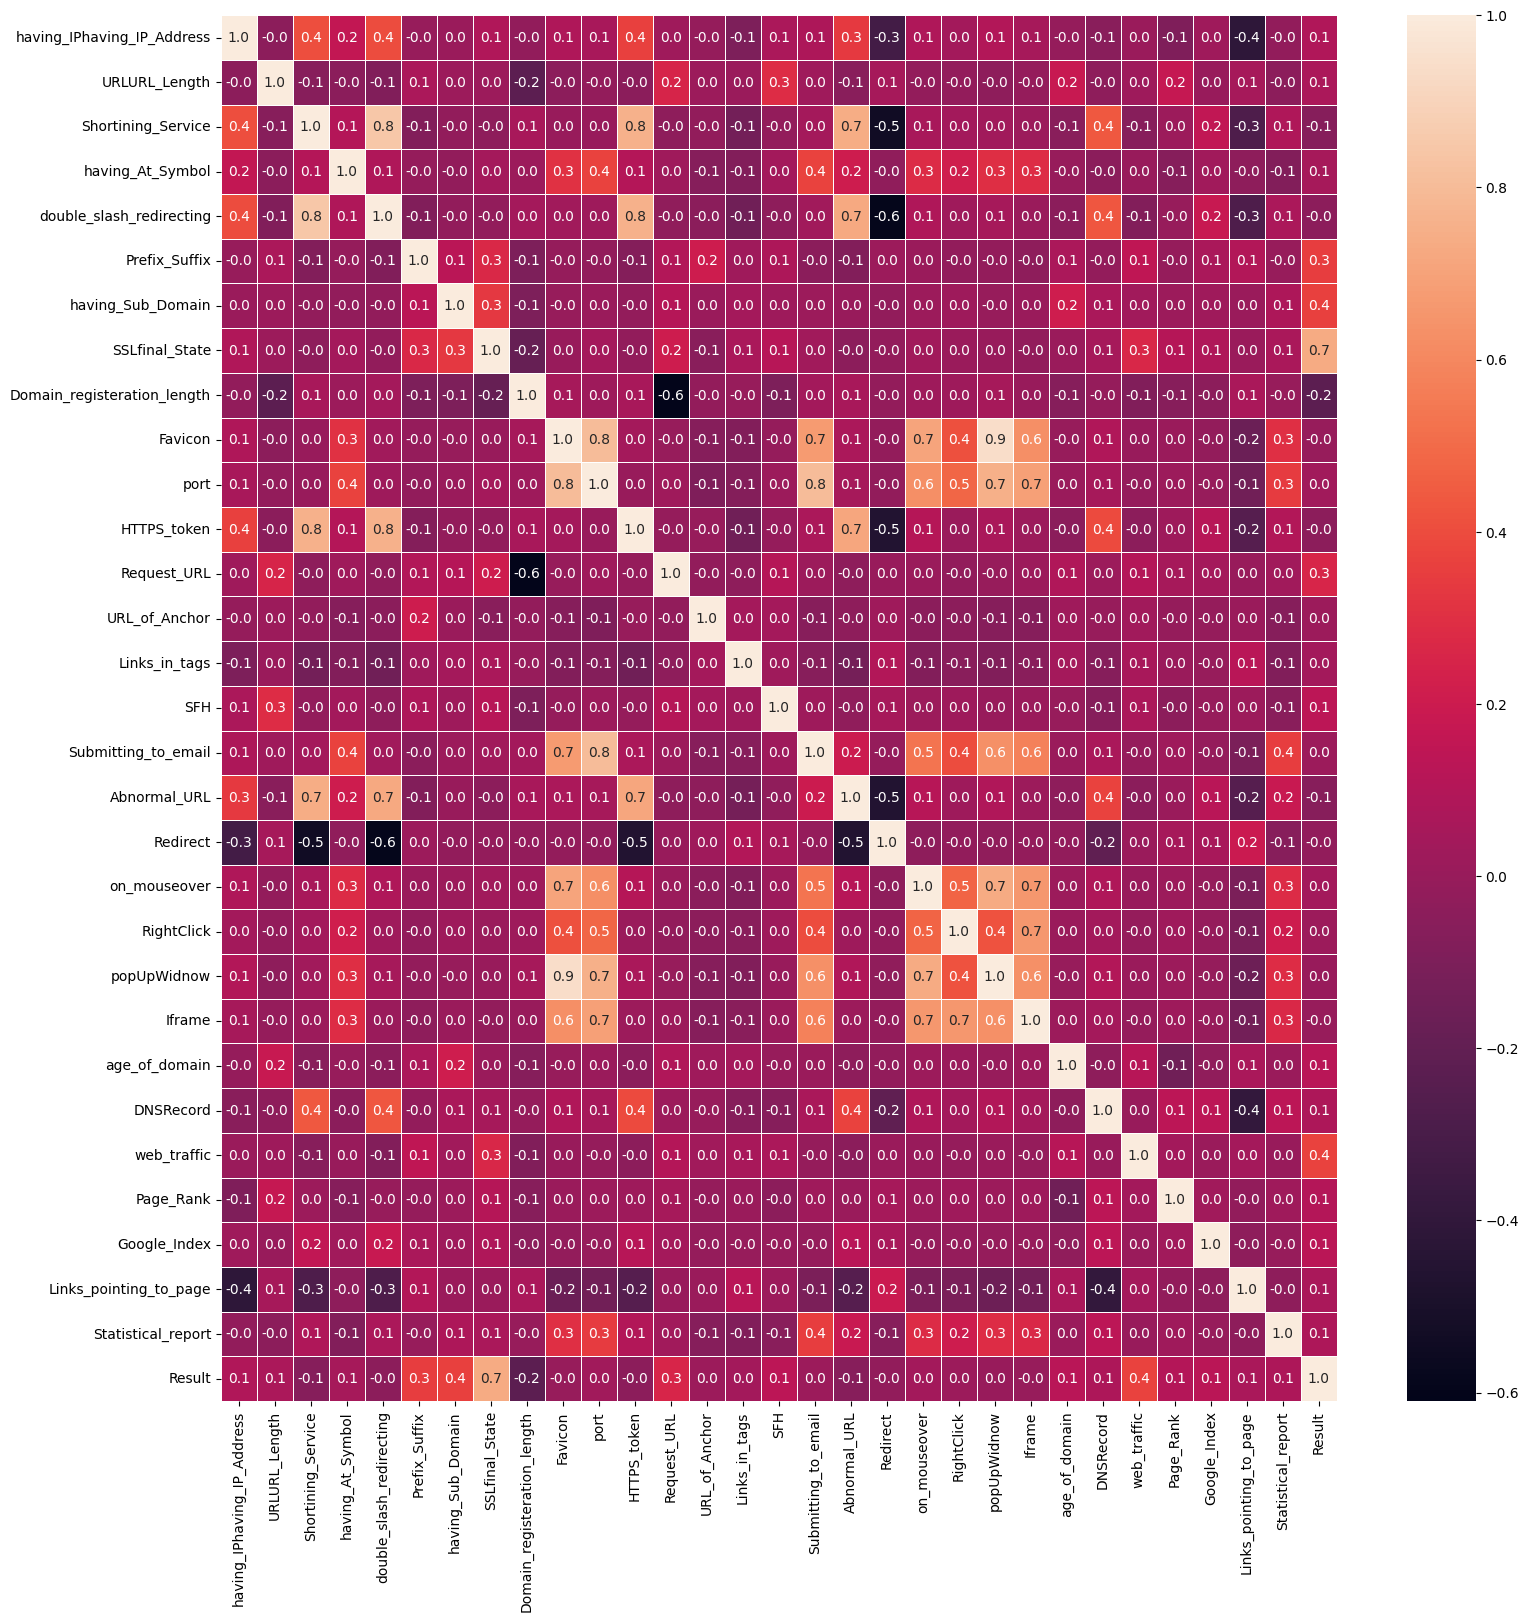

In [12]:
# Correlation Heatmap
f,ax=plt.subplots(figsize=(18,18))
sns.heatmap(df.corr(),annot=True, linewidths=.5, fmt='.1f',ax=ax)

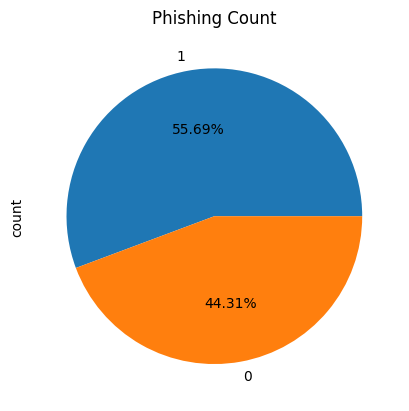

In [13]:
# Phishing Count in pie chart

df['Result'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

### 4. Splitting the Data

After analyzing the dataset, the 'Result' column is taken as our target variable and remaining features are the input variables.

In [14]:
X = df.drop(columns='Result',axis=1)
X.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,0,1,1,1,0,0,0,0,0,1,...,1,1,1,0,0,0,0,1,1,0
1,1,1,1,1,1,0,-1,1,0,1,...,1,1,1,0,0,-1,0,1,1,1
2,1,-1,1,1,1,0,0,0,0,1,...,1,1,1,1,0,1,0,1,-1,0
3,1,-1,1,1,1,0,0,0,1,1,...,1,1,1,0,0,1,0,1,0,1
4,1,-1,0,1,1,0,1,1,0,1,...,1,0,1,0,0,-1,0,1,1,1


In [15]:
y=df['Result']
y.head()

0    0
1    0
2    0
3    0
4    1
Name: Result, dtype: int64

In [16]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8844, 30), (8844,), (2211, 30), (2211,))

### 5. Comparing Machine Learning Models

The supervised machine learning models considered to train the dataset in this notebook are:

1. Logistic Regression

2. k-Nearest Neighbors

3. Support Vector Clasifier

4. Decision Tree

5. Random Forest

6. XGBoost

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

In [19]:
def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        "Logistic Regression": LogisticRegression(),
        "k-Nearest Neighbors": KNeighborsClassifier(),
        "Support Vector Classifier": SVC(),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "XGBoost": XGBClassifier()
    }
    
    results = []
    
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        results.append({
            "Model": model_name,
            "Accuracy": accuracy,
            "F1 Score": f1
        })
    
    return pd.DataFrame(results)

In [20]:
results = train_and_evaluate_models(X_train, X_test, y_train, y_test)

In [21]:
sort = results.sort_values(by=['Accuracy', 'F1 Score'],ascending=False).reset_index(drop=True)

In [22]:
sort

,Model,Accuracy,F1 Score
0,XGBoost,0.968792,0.968753
1,Random Forest,0.966079,0.966045
2,k-Nearest Neighbors,0.958842,0.958807
3,Decision Tree,0.956128,0.956120
4,Support Vector Classifier,0.951153,0.951095
5,Logistic Regression,0.911352,0.911196


### 7. Conclusion

Decided to use the XGBoost Classifier model as its accuracy score and f1 score are the highest.